<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#680EAB;overflow:hidden;font-weight:800">Prediction Hiring Decisions</div>

_______________

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv


## <b><div style='padding:15px;background-color:#680EAB;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**Introduction**

This dataset provides insights into factors influencing hiring decisions. Each record represents a candidate with various attributes considered during the hiring process. The goal is to predict whether a candidate will be hired based on these attributes.

**Variables Description**

* Age
    * Description: Age of the candidate.


* Data Range: 20 to 50 years.
    * Data Type: Integer.


* Gender
    * Description: Gender of the candidate.


* Categories: Male (0) or Female (1).
    * Data Type: Binary.


* Education Level
    * Description: Highest level of education attained by the candidate.
    * Categories:
        * 1: Bachelor's (Type 1)
        * 2: Bachelor's (Type 2)
        * 3: Master's
        * 4: PhD
    * Data Type: Categorical.


* Experience Years
    * Description: Number of years of professional experience.
    * Data Range: 0 to 15 years.
    * Data Type: Integer.


* Previous Companies Worked
    * Description: Number of previous companies where the candidate has worked.
    * Data Range: 1 to 5 companies.
    * Data Type: Integer.


* Distance From Company
    * Description: Distance in kilometers from the candidate's residence to the hiring company.
    * Data Range: 1 to 50 kilometers.
    * Data Type: Float (continuous).


* Interview Score
    * Description: Score achieved by the candidate in the interview process.
    * Data Range: 0 to 100.
    * Data Type: Integer.


* Skill Score
    * Description: Assessment score of the candidate's technical skills.
    * Data Range: 0 to 100.
    * Data Type: Integer.


* Personality Score
    * Description: Evaluation score of the candidate's personality traits.
    * Data Range: 0 to 100.
    * Data Type: Integer.


* Recruitment Strategy
    * Description: Strategy adopted by the hiring team for recruitment.
    * Categories:
        * 1: Aggressive
        * 2: Moderate
        * 3: Conservative
    * Data Type: Categorical.


* Hiring Decision (Target Variable)
    * Description: Outcome of the hiring decision.
    * Categories:
        * 0: Not hired
        * 1: Hired
    * Data Type: Binary (Integer).


## <b><div style='padding:15px;background-color:#680EAB;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Import Libraries</div></b>

In [2]:
# importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
    
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# full display of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

## <b><div style='padding:15px;background-color:#680EAB;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Download Dataset</div></b>

In [3]:
df = pd.read_csv("/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv")

In [4]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


## <b><div style='padding:15px;background-color:#680EAB;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (1500, 11)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Age,int64,0,0.0,0,31,1500,20.000000,50.000000,35.148667,9.252728,26.000000,39.000000,48.000000
Gender,int64,0,0.0,0,2,1500,0.000000,1.000000,0.492000,0.500103,1.000000,1.000000,0.000000
EducationLevel,int64,0,0.0,0,4,1500,1.000000,4.000000,2.188000,0.862449,2.000000,4.000000,2.000000
ExperienceYears,int64,0,0.0,0,16,1500,0.000000,15.000000,7.694000,4.641414,0.000000,12.000000,3.000000
PreviousCompanies,int64,0,0.0,0,5,1500,1.000000,5.000000,3.002000,1.410670,3.000000,3.000000,2.000000
DistanceFromCompany,float64,0,0.0,0,1500,1500,1.031376,50.992462,25.505379,14.567151,26.783828,25.862694,9.920805
InterviewScore,int64,0,0.0,0,101,1500,0.000000,100.000000,50.564000,28.626215,48.000000,35.000000,20.000000
SkillScore,int64,0,0.0,0,101,1500,0.000000,100.000000,51.116000,29.353563,78.000000,68.000000,67.000000
PersonalityScore,int64,0,0.0,0,101,1500,0.000000,100.000000,49.387333,29.353201,91.000000,80.000000,13.000000
RecruitmentStrategy,int64,0,0.0,0,3,1500,1.000000,3.000000,1.893333,0.689642,1.000000,2.000000,2.000000


<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> No NaN, no Dups</div>

In [6]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy', 'HiringDecision'], dtype='object')

## <b><div style='padding:15px;background-color:#680EAB;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

In [7]:
# Features histogram
for col in df.columns:
    plt = px.histogram(df, x = col, title=col, color_discrete_sequence=px.colors.sequential.Cividis)
    plt.show()

In [8]:
# Features Histogram vs Target
for col in df.columns:
    plt = px.histogram(df, x = col, color ="HiringDecision", title=col + ' vs Hiring Decision', color_discrete_sequence=px.colors.sequential.Agsunset)
    plt.show()

In [9]:
plt = px.histogram(df, x= 'PreviousCompanies', y = 'ExperienceYears', color= 'EducationLevel',title="Previous Companies and Experience Years Distribution")
plt.show()

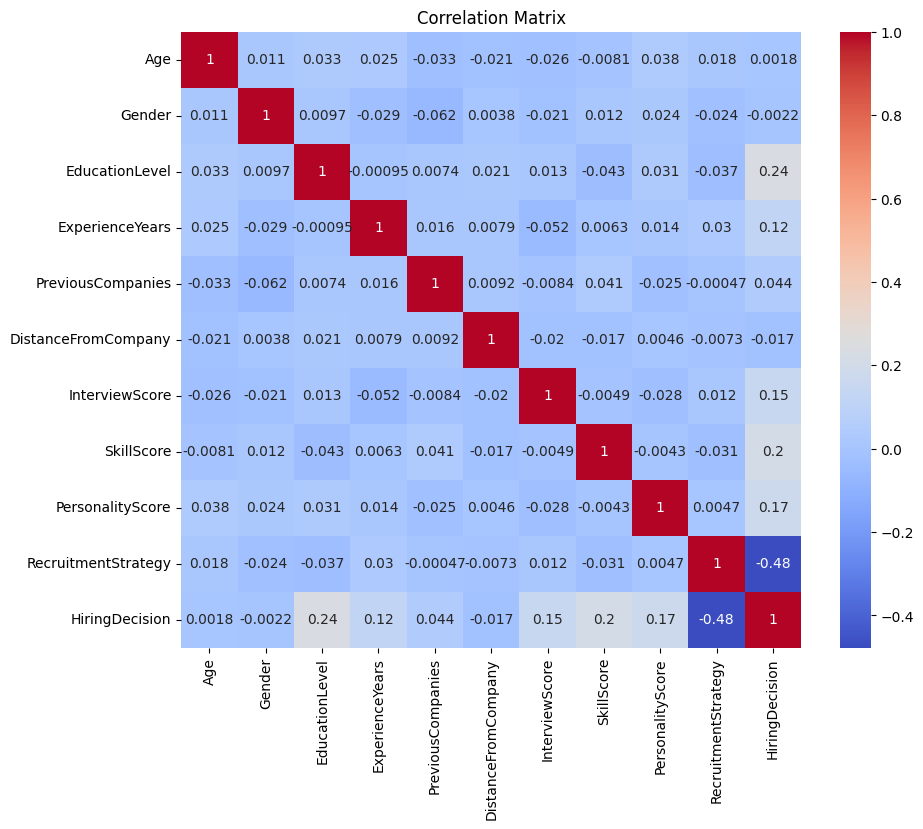

In [10]:
# Heatmap and Correlation Matrix
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## <b><div style='padding:15px;background-color:#680EAB;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  Machine Learning</div></b>

In [11]:
# Split data into Features and Target
X = df.drop(['HiringDecision'], axis=1)
y = df['HiringDecision']

In [12]:
# Split Data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODEL BUILDING

`Models` = a set of classification models that you are testing on your dataset, including Linear Regression, Random Forest Classifier, Decision Tree Classifier, Gradient Boosting Classifier, CatBoost Classifier, and XGBoost.

These models are commonly used for binary classification tasks, where the target variable can take values of 0 or 1 (representing purchase intent).

`MSE` is a measure of the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance.

`R2 R-Squared` value shows how well the model predicts the outcome of the dependent variable. R-Squared values range from 0 to 1. An R-Squared value of 0 means that the model explains or predicts 0% of the relationship between the dependent and independent variables.

In [14]:
# Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'CatBoost Classifier': CatBoostClassifier(random_state=42, verbose=False),
    'XGBoost': XGBClassifier(random_state=42)
}

# Training the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")
    
print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print("\n")
print(f"Best model: {best_model_name} with R2: {best_model_score:.2f}")

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
CatBoost Classifier trained.
XGBoost trained.
--------------------------------------------------------------------
Linear Regression MSE: 0.13, R2: 0.37
Random Forest MSE: 0.07, R2: 0.67
Decision Tree MSE: 0.12, R2: 0.41
Gradient Boosting MSE: 0.07, R2: 0.67
CatBoost Classifier MSE: 0.05, R2: 0.77
XGBoost MSE: 0.06, R2: 0.70


Best model: CatBoost Classifier with R2: 0.77


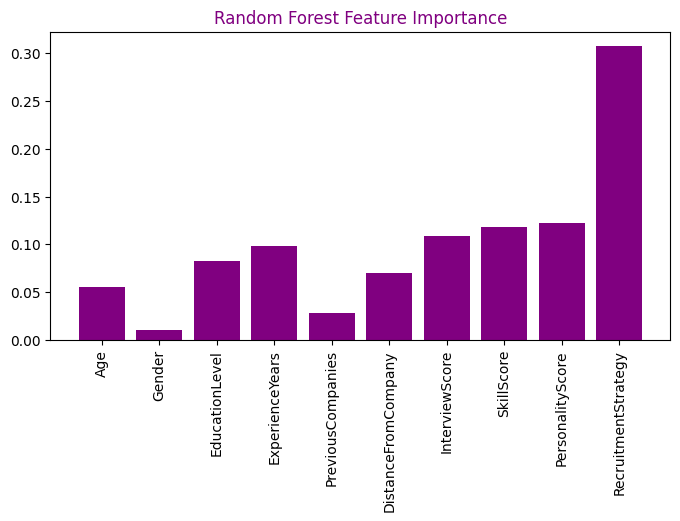

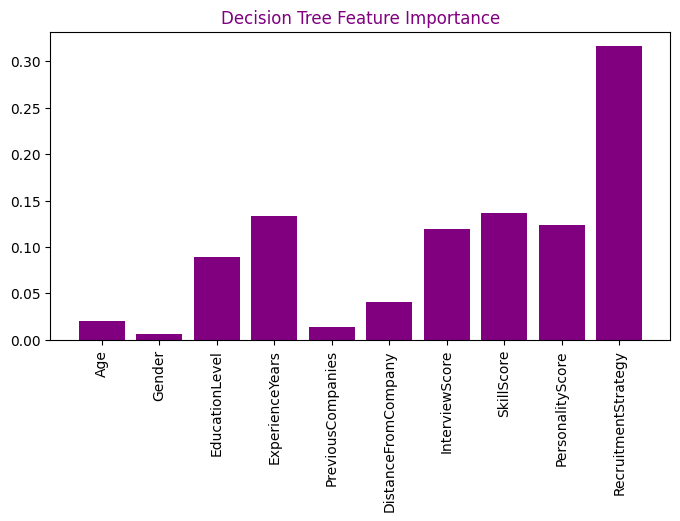

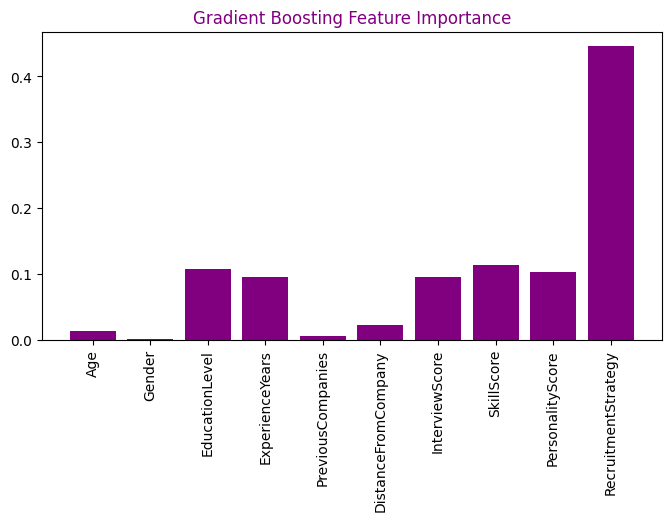

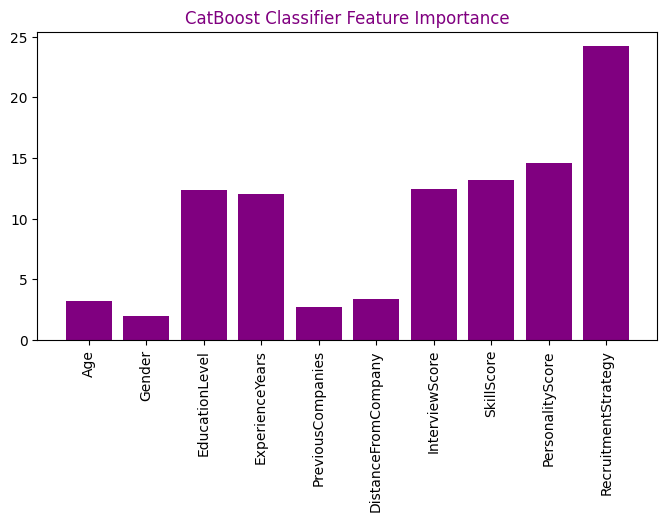

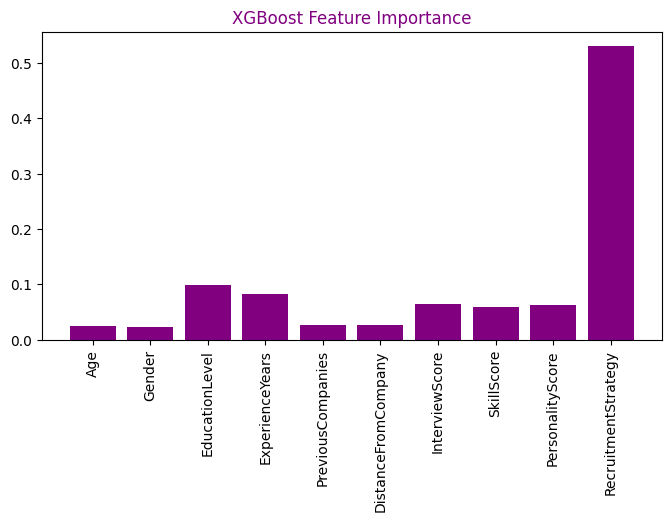

In [15]:
# Feature Importance
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8, 4))
        plt.bar(range(len(feature_importances)), feature_importances, color = 'purple')
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f"{name} Feature Importance", color = 'purple')
        plt.show()

## <b><div style='padding:15px;background-color:#680EAB;color:white;border-radius:40px;font-size:110%;text-align: center'>7  |  CatBoostClassifier</div></b>

In [16]:
# Fit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from catboost import CatBoostClassifier

ct=CatBoostClassifier(verbose=False)
ct.fit(X_train,y_train)

In [17]:
# Predict the Test set results

y_pred = ct.predict(X_test)

`Accuracy Score` Accuracy is the percentage of data that are correctly classified, which ranges from 0 to 1. This measure is quite instinctive that we just compare the predicted class and the actual class, and we want the model to correctly classify the data.

In [18]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9533


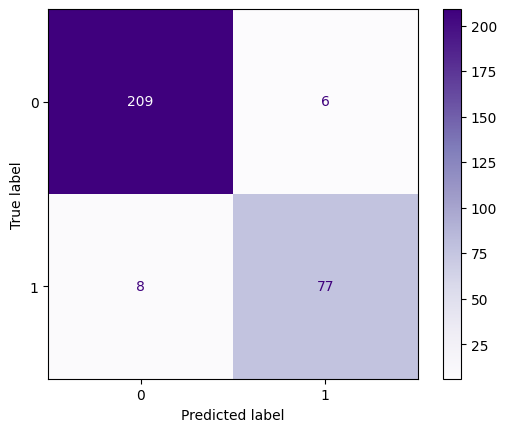

In [19]:
# ConfusionMatrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Purples, normalize = None, display_labels = ['0', '1'])

In [20]:
# classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       215
           1       0.93      0.91      0.92        85

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



In [21]:
# classification_report_imbalanced

from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.97      0.91      0.97      0.94      0.89       215
          1       0.93      0.91      0.97      0.92      0.94      0.87        85

avg / total       0.95      0.95      0.92      0.95      0.94      0.88       300



## <b><div style='padding:15px;background-color:#680EAB;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked this code, consider upvoting it. Thank you.</div></b>